# 6.1

In [20]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
%matplotlib inline

data = []

file = open('6.csv', 'r')

mylambda = 1 / float(file.readline()[9:])
t_0 = float(file.readline()[6:])
t = float(file.readline()[4:])

for str in file:
    for c in str.split():
        data.append(float(c))
file.close()   

Для каждого момента времени $k \cdot t_0, k \in N,$ посчитаем величину $E(N_t | N_s)$ = $E(N_t - N_s + N_s | N_s)$ = $E(N_t - N_s | N_s) + E(N_s | N_s)$ = $\lambda \cdot (t - s) + N_s$ = $\lambda \cdot (t - k \cdot t_0) + N_s$.

In [66]:
k = 0.
Ns = np.array([], dtype=float)
counter = 0
for num in data:
    if (num > t or num > k * t_0):
        Ns = np.append(Ns, counter)
        k += 1
    counter += 1  
n = np.arange(0, t + 1, t_0)
while (len(Ns) < len(n)):
    Ns = np.append(Ns, counter)

E = np.array([], dtype=float)
for _k in range(len(Ns)):
    E = np.append(E, mylambda * (t - _k * t_0) + Ns[_k])

Построим график зависимости $F(t) = E(N_t | N_s)$ (в явном виде: F(t) = $\lambda \cdot (t - k \cdot t_0) + N_s$)

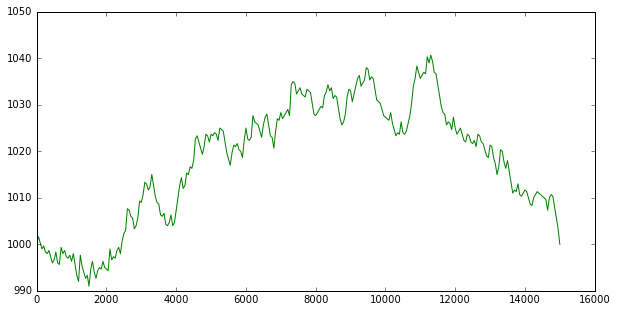

In [67]:
plt.figure(figsize=(10, 5))
plt.plot(n, E, 'green')
plt.show()